# Thad Hoskins
# Capstone - Midterm Project

# Recognizing Traffic Signs
The goal of this project is to build a model capable of determining the type of traffic sign that is displayed in an image captured under different real-life conditions and showing obstructions, poor lighting, or even the sign being far away from the camera. We provide you with labeled images already splited in three files (tran/val/test) and a predefined list of signs to recognise. 

http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf<br>
https://github.com/prateeksawhney97/Traffic-Sign-Classifier-Project-P3/blob/master/Traffic_Sign_Classifier.ipynb<br>
https://www.pyimagesearch.com/2016/08/01/lenet-convolutional-neural-network-in-python/<br>
https://medium.com/@techreigns/traffic-signs-classification-with-a-convolutional-neural-network-75911a1904<br>
https://www.geeksforgeeks.org/python-image-classification-using-keras/<br>
https://medium.com/@dipti.rohan.pawar/improving-performance-of-convolutional-neural-network-2ecfe0207de7

<ul>
    <li>Gather data (data already provided)</li>
    <li>Analyze data</li>
    <li>Pro-processing, if necessary</li>
    <li>Create model using Convoluted Neural Network (CNN)</li>
    <li>Evaluate</li>
    <li>Tune model</li>
    <li>Final Evaluation</li>
    <li>Conclusion</li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import cv2
import pickle
import random

from skimage import transform
from skimage import exposure
from skimage import io

%matplotlib inline

In [2]:
# Download and unzip

dataroot = "dataroot/"

In [2]:
!mkdir dataroot 
!wget -P dataroot https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_1.zip
!wget -P dataroot https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_2.zip
!wget -P dataroot https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_3.zip 

mkdir: cannot create directory ‘dataroot’: File exists
--2021-10-12 00:58:41--  https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_1.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32074743 (31M) [application/zip]
Saving to: ‘dataroot/data_1.zip.18’

data_1.zip.18       100%[===================>]  30.59M  5.23MB/s    in 6.0s    

2021-10-12 00:58:48 (5.12 MB/s) - ‘dataroot/data_1.zip.18’ saved [32074743/32074743]

--2021-10-12 00:58:50--  https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_2.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting t

In [3]:
# Unzip
import zipfile
with zipfile.ZipFile(dataroot+"data_1.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)
with zipfile.ZipFile(dataroot+"data_2.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)
with zipfile.ZipFile(dataroot+"data_3.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)

In [4]:
# Load sign names
df = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/signnames.csv")
signnames = pd.Series(df.SignName.values,index=df.ClassId).to_dict()
signnames

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go st

In [5]:
# Load images
signimages_train = pickle.load( open( dataroot+"train.p", "rb" ) )
signimages_valid = pickle.load( open( dataroot+"valid.p", "rb" ) )
signimages_test = pickle.load( open( dataroot+"test.p", "rb" ) )

The image shows a Turn left ahead sign


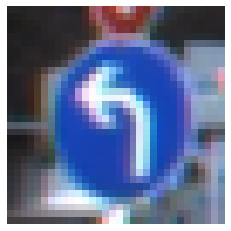

In [6]:
# Preview image
inx = 20123
plt.imshow(signimages_train['features'][inx])
plt.axis("off");
print("The image shows a {} sign".format(signnames[signimages_train['labels'][inx]]))

In [7]:
y_train = signimages_train["labels"].copy()
X_train = signimages_train["features"].copy()
y_val = signimages_valid["labels"].copy()
X_val = signimages_valid["features"].copy()
y_test = signimages_test["labels"].copy()
X_test = signimages_test["features"].copy()

In [8]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((34799, 32, 32, 3),
 (34799,),
 (4410, 32, 32, 3),
 (4410,),
 (12630, 32, 32, 3),
 (12630,))

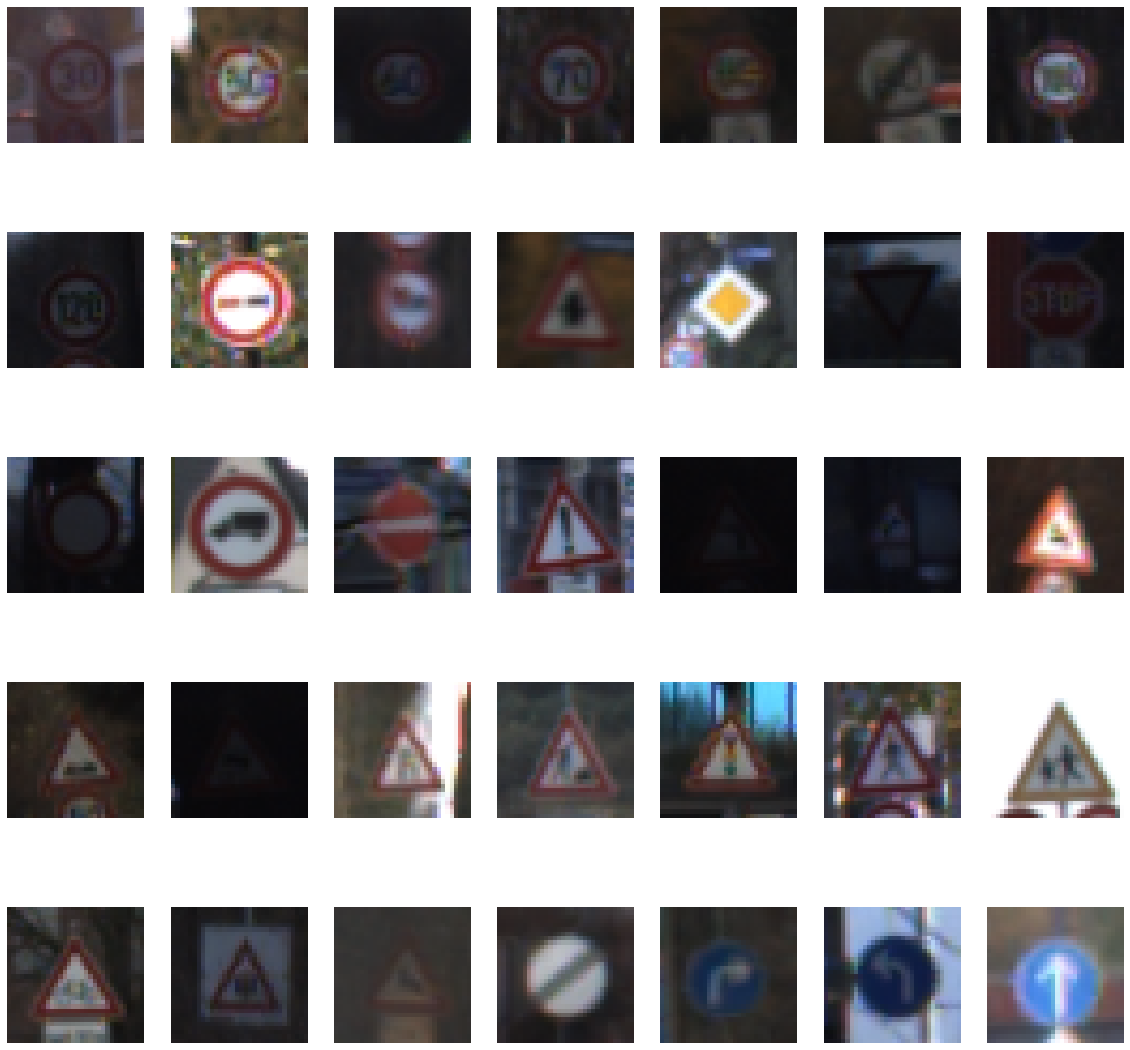

In [9]:
# https://github.com/prateeksawhney97/Traffic-Sign-Classifier-Project-P3/blob/master/Traffic_Sign_Classifier.ipynb
    
fig=plt.figure(figsize=(20, 20))
columns = 7
rows = 5
for i in range(1, columns*rows + 1):
    X_few = X_train[y_train == i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_few[0, :, :, :])
    plt.axis("off");
plt.show()

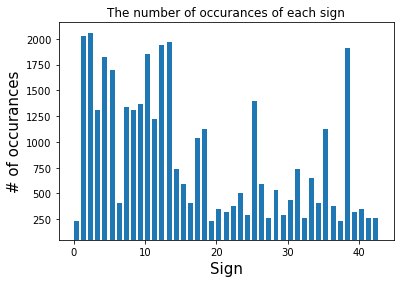

In [10]:
unique, frequency = np.unique(y_train, return_counts = True)

plt.bar(unique, frequency, width=0.7, bottom=50, align='edge')
plt.title('The number of occurances of each sign')
plt.xlabel('Sign', fontsize=15)
plt.ylabel('# of occurances', fontsize=15)
plt.show()

In [11]:
frequency
np.unique(frequency)

array([ 180,  210,  240,  270,  300,  330,  360,  390,  450,  480,  540,
        599,  690,  990, 1080, 1170, 1260, 1290, 1320, 1350, 1650, 1770,
       1800, 1860, 1890, 1920, 1980, 2010])

In [12]:
frequency.max(), frequency.min()

(2010, 180)

<p>For the model, I'm using a Convolutional Neural Network (CNN). There were many sources for how to create the model. I have included many in this notebook at the top. However, my starting points are:<br>
    https://www.tensorflow.org/tutorials/images/cnn<br>
    https://www.tensorflow.org/tutorials/images/classification</p>
<p>The Tensor Flow write-up is very basic and I do not expect a very accurate model. But, using that I can alter to improve performance.</p>
<p>As demonstrated by <a href="http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf">http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf</a> we can see that greater than 99% accuracy is possible.</p>

In [16]:
#!pip install keras-tuner
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,Dense,Dropout,Flatten,MaxPooling2D
from tensorflow.keras.models import Sequential
from keras_tuner.tuners import RandomSearch

In [17]:
# https://www.sicara.ai/blog/hyperparameter-tuning-keras-tuner
# https://www.pyimagesearch.com/2021/06/07/easy-hyperparameter-tuning-with-keras-tuner-and-tensorflow/
# https://www.guru99.com/convnet-tensorflow-image-classification.html

import keras_tuner
from keras_tuner import HyperModel

class CNNHyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        model = keras.Sequential()
        model.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=self.input_shape))
        model.add(Conv2D(filters=16, kernel_size=3, activation='relu'))
        model.add(MaxPooling2D(pool_size=2))
        model.add(Dropout(rate=0.05))
        
        model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
        model.add(Conv2D(filters=hp.Choice('num_filters', values=[32, 64], default=64),
                         activation='relu',
                         kernel_size=3))
        model.add(MaxPooling2D(pool_size=2))
        model.add(Dropout(rate=0.1))

        model.add(Flatten())
        model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32, default=512),
                        activation=hp.Choice('dense_activation', values=['relu', 'sigmoid'], default='relu')))
        model.add(Dropout(rate=0.45))

        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(optimizer=keras.optimizers.Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-1,
                                                               sampling='LOG', default=1e-3)),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy']
        )
        return model

In [18]:
HYPERBAND_MAX_EPOCHS = 40
MAX_TRIALS = 10
EXECUTION_PER_TRIAL = 2
SEED = 42
INPUT_SHAPE = (32, 32, 3)
NUM_CLASSES = len(unique)

hypermodel = CNNHyperModel(input_shape=INPUT_SHAPE, num_classes=NUM_CLASSES)

In [19]:
tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    seed=SEED,
    max_trials=MAX_TRIALS,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='random_search',
    project_name='Traffic Sign CNN'
)

INFO:tensorflow:Reloading Oracle from existing project random_search/Traffic Sign CNN/oracle.json
INFO:tensorflow:Reloading Tuner from random_search/Traffic Sign CNN/tuner0.json


In [20]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_filters (Choice)
{'default': 64, 'conditions': [], 'values': [32, 64], 'ordered': True}
units (Int)
{'default': 128, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
dense_activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'], 'ordered': False}
learning_rate (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.1, 'step': None, 'sampling': 'log'}


In [21]:
N_EPOCH_SEARCH = 30

tuner.search(X_train, y_train, epochs=N_EPOCH_SEARCH, validation_data=(X_val, y_val),
             callbacks=[keras.callbacks.EarlyStopping(monitor="val_accuracy", baseline=.2, patience=10)])

Trial 1 Complete [00h 48m 10s]
val_accuracy: 0.986507922410965

Best val_accuracy So Far: 0.9873015880584717
Total elapsed time: 00h 48m 10s
INFO:tensorflow:Oracle triggered exit


In [22]:
import pandas as pd
pd.DataFrame(tuner.results_summary())

Results summary
Results in random_search/Traffic Sign CNN
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_filters: 32
units: 448
dense_activation: sigmoid
learning_rate: 0.0005251811020680042
Score: 0.9873015880584717
Trial summary
Hyperparameters:
num_filters: 64
units: 352
dense_activation: sigmoid
learning_rate: 0.00016485408864427083
Score: 0.986507922410965
Trial summary
Hyperparameters:
num_filters: 64
units: 416
dense_activation: sigmoid
learning_rate: 0.00012349971647463014
Score: 0.9861678183078766
Trial summary
Hyperparameters:
num_filters: 32
units: 96
dense_activation: sigmoid
learning_rate: 0.0001750942941667167
Score: 0.9859410226345062
Trial summary
Hyperparameters:
num_filters: 32
units: 256
dense_activation: sigmoid
learning_rate: 0.0003969777071876592
Score: 0.9842403531074524
Trial summary
Hyperparameters:
num_filters: 32
units: 384
dense_activation: sigmoid
learning_rate: 0.00038336436721221595
Score: 0.98310

""


In [23]:
# Retrieve the best model.
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model.
best_model.evaluate(X_test, y_test)

395/395 [==============================] - 5s 12ms/step - loss: 0.1132 - accuracy: 0.9704


[0.11324333399534225, 0.9703879356384277]

## Get the best model and rerun the CNN using that model then use it below for the classification.

Index: 10523
Actual: Speed limit (60km/h) sign
Predicted: Speed limit (60km/h) (100.00% confidence).
And was correct.


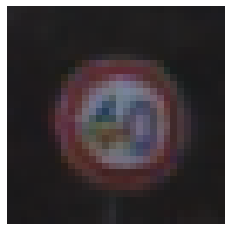

In [24]:
import tensorflow as tf

test_index = random.randint(0, len(X_test))
print(f"Index: {test_index}")
plt.imshow(X_test[test_index])
plt.axis("off");
print("Actual: {} sign".format(signnames[y_test[test_index]]))

img_array = tf.expand_dims(X_test[test_index], 0) # Create a batch

predictions = best_model.predict(img_array)
score = tf.nn.softmax(predictions[0])
confidence = 100 * (np.max(score)/0.06078681)

print(
    "Predicted: {} ({:.2f}% confidence)."
    .format(signnames[np.argmax(score)], confidence)
)
if y_test[test_index] == np.argmax(score):
    print("And was correct.")
else:
    print("And was wrong.")

# Wrong: 12089